# Задание 1: функция удаления дубликатов в списке


In [1]:
from random import seed, sample
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import unittest
import doctest
import sqlite3

In [2]:
def del_duplicates(the_list):
    '''
        
    >>> del_duplicates([1,3,4,2,3,5])
    [1, 3, 4, 2, 5]
    
    >>> del_duplicates([1,3,4,2,3,5])
    [1, 4, 2, 5]
    
    >>> del_duplicates([1,3,4,2,3,5])
        [1, 3, 4, 2, 5]
        
    >>> del_duplicates([1,3,4,2,'3',5])
    [1, 3, 4, 2, '3', 5]
    
    '''   
    new_list = []
    
    for element in the_list:
        
        if element not in new_list:
            new_list.append(element)
            
        else:
            continue
        
    return new_list



In [3]:
doctest.testmod(verbose=True)

Trying:
    del_duplicates([1,3,4,2,3,5])
Expecting:
    [1, 3, 4, 2, 5]
ok
Trying:
    del_duplicates([1,3,4,2,3,5])
Expecting:
    [1, 4, 2, 5]
**********************************************************************
File "__main__", line 7, in __main__.del_duplicates
Failed example:
    del_duplicates([1,3,4,2,3,5])
Expected:
    [1, 4, 2, 5]
Got:
    [1, 3, 4, 2, 5]
Trying:
    del_duplicates([1,3,4,2,3,5])
Expecting:
        [1, 3, 4, 2, 5]
**********************************************************************
File "__main__", line 10, in __main__.del_duplicates
Failed example:
    del_duplicates([1,3,4,2,3,5])
Expected:
        [1, 3, 4, 2, 5]
Got:
    [1, 3, 4, 2, 5]
Trying:
    del_duplicates([1,3,4,2,'3',5])
Expecting:
    [1, 3, 4, 2, '3', 5]
ok
1 items had no tests:
    __main__
**********************************************************************
1 items had failures:
   2 of   4 in __main__.del_duplicates
4 tests in 2 items.
2 passed and 2 failed.
***Test Failed*** 2 failur

TestResults(failed=2, attempted=4)

Функция работает для любых типов данных, при этом элементы int('5') и '5' считаются разными.

In [4]:
del_duplicates(['1','2','3',2,'4',2,'1'])

['1', '2', '3', 2, '4']

In [5]:
class TestNotebook(unittest.TestCase):
    
    def test_del_duplicate(self):
        self.assertEqual(del_duplicates([1,2,4,3,2]),[1,2,4,3])
        self.assertEqual(del_duplicates([1,3,2,2,1]),[1,3,2])
        self.assertEqual(del_duplicates(['2',2,2.0]),['2',2,])
        
unittest.main(argv=[''],verbosity=2,exit=False)

test_del_duplicate (__main__.TestNotebook) ... ok

----------------------------------------------------------------------
Ran 1 test in 0.001s

OK


# Описание рассуждений по определению асимптотической сложности алгоритма смотрите в pdf файле


In [6]:
def alg_complexity(n):
    
    sumation = 0
    
    for i in range(1, n+1):
        sumation += (i-1)
        
    print('Отношение вычисленной сложности к нижней границе асимптотической сложности (n^2)/2: ', (sumation+n)/((n**2)/2))
            
    print('Вычислительная сложность в худшем случае: ', (sumation+n))
    
    return sumation+n



In [7]:
alg_complexity(500)
alg_complexity(1000000)


Отношение вычисленной сложности к нижней границе асимптотической сложности (n^2)/2:  1.002
Вычислительная сложность в худшем случае:  125250
Отношение вычисленной сложности к нижней границе асимптотической сложности (n^2)/2:  1.000001
Вычислительная сложность в худшем случае:  500000500000


500000500000

In [8]:
list_n = list(range(100000,1000000,50000))




In [9]:
df = pd.DataFrame()

In [10]:
df['n'] = list_n

In [11]:
df

,n
0,100000
1,150000
2,200000
3,250000
4,300000
5,350000
6,400000
7,450000
8,500000
9,550000


In [12]:
df['real_complexity'] = df['n'].apply(lambda x: alg_complexity(x))

Отношение вычисленной сложности к нижней границе асимптотической сложности (n^2)/2:  1.00001
Вычислительная сложность в худшем случае:  5000050000
Отношение вычисленной сложности к нижней границе асимптотической сложности (n^2)/2:  1.0000066666666667
Вычислительная сложность в худшем случае:  11250075000
Отношение вычисленной сложности к нижней границе асимптотической сложности (n^2)/2:  1.000005
Вычислительная сложность в худшем случае:  20000100000
Отношение вычисленной сложности к нижней границе асимптотической сложности (n^2)/2:  1.000004
Вычислительная сложность в худшем случае:  31250125000
Отношение вычисленной сложности к нижней границе асимптотической сложности (n^2)/2:  1.0000033333333334
Вычислительная сложность в худшем случае:  45000150000
Отношение вычисленной сложности к нижней границе асимптотической сложности (n^2)/2:  1.0000028571428572
Вычислительная сложность в худшем случае:  61250175000
Отношение вычисленной сложности к нижней границе асимптотической сложности (n^

In [13]:
df['theta_complexity'] = df['n'].apply(lambda x: (x**2)/2)

In [14]:
df['O_complexity_n_2'] = df['n'].apply(lambda x: (x**2))

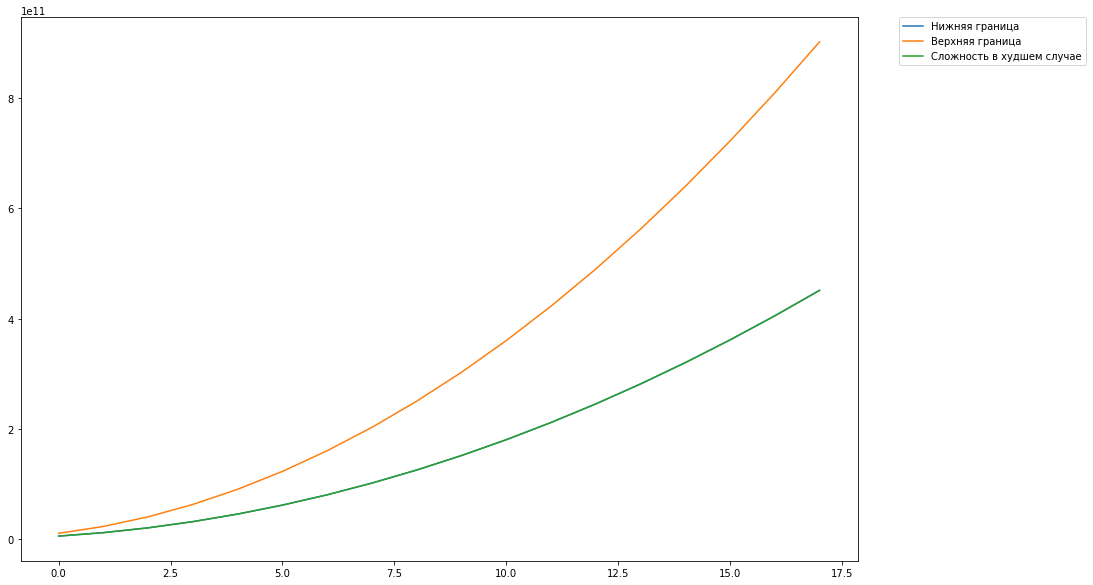

In [15]:
fig, ax = plt.subplots(figsize=(15, 10))

plt.plot(list(df['theta_complexity']),label="Нижняя граница")
plt.plot(list(df['O_complexity_n_2']),label="Верхняя граница")
plt.plot(list(df['real_complexity']),label="Сложность в худшем случае")

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

plt.show()

#Нижняя граница и сложгость в худшем случае почти сливаются в одну кривую


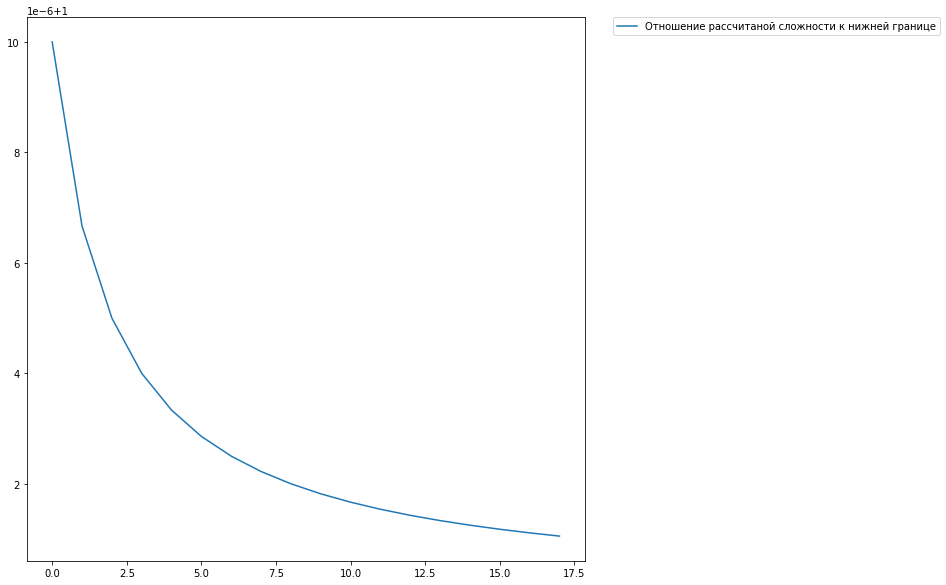

In [16]:
fig, ax = plt.subplots(figsize=(10, 10))
plt.plot(df['real_complexity']/df['theta_complexity'],label='Отношение рассчитаной сложности к нижней границе')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

# Написание SQL запроса


In [17]:
conn = sqlite3.connect("database.db") 
cursor = conn.cursor()
 

cursor.execute("""CREATE TABLE employees 
                  (full_name text, position text, department text, PRIMARY KEY(full_name))""")

In [18]:
employees = [('Ivanov I. A.', 'Software Developer', 'IT-services'),
            ('Volkov A. A.', 'Software Developer', 'IT-services'),
            ('Nazarova M. I.', 'Software Developer', 'IT-services'),
            ('John Brown', 'Software Developer', 'IT-services'),
            ('Elizabeth Willson', 'Software Developer', 'IT-services'),
            ('Kanin A. I.', 'Software Developer', 'IT-services'),
            ('Efimova U. A.', 'Designer', 'IT-services'),
            ('Shevchenko D. S.', 'Data-Scientist', 'AI-Lab'),
            ('Varlamova D. S.', 'Data-Scientist', 'AI-Lab'),
            ('Kudryashov D. E.', 'Data-Engineer', 'AI-Lab'),
            ('Kozlov A. E.', 'Software Developer', 'AI-Lab'),
            ('Yudin V. E.', 'System Administrator', 'AI-Lab'),
            ('Kerzhakov V. V.', 'Financier', 'Financial Department'),
            ('Vavin V. V.', 'Financier', 'Financial Department'),
            ('Lebedeva A. M.', 'Financier', 'Financial Department'),
            ('Volodina A. M.', 'Financier', 'Financial Department')]
 
cursor.executemany("INSERT INTO employees VALUES (?,?,?)", employees)
conn.commit()


In [19]:

query = """SELECT 
                full_name,
                position,
                department,
                count(position) OVER(PARTITION BY department) AS sum_pos
                FROM employees
            """

cursor.execute(query)

In [20]:
cursor.fetchall()

[('Shevchenko D. S.', 'Data-Scientist', 'AI-Lab', 5),
 ('Varlamova D. S.', 'Data-Scientist', 'AI-Lab', 5),
 ('Kudryashov D. E.', 'Data-Engineer', 'AI-Lab', 5),
 ('Kozlov A. E.', 'Software Developer', 'AI-Lab', 5),
 ('Yudin V. E.', 'System Administrator', 'AI-Lab', 5),
 ('Kerzhakov V. V.', 'Financier', 'Financial Department', 4),
 ('Vavin V. V.', 'Financier', 'Financial Department', 4),
 ('Lebedeva A. M.', 'Financier', 'Financial Department', 4),
 ('Volodina A. M.', 'Financier', 'Financial Department', 4),
 ('Ivanov I. A.', 'Software Developer', 'IT-services', 7),
 ('Volkov A. A.', 'Software Developer', 'IT-services', 7),
 ('Nazarova M. I.', 'Software Developer', 'IT-services', 7),
 ('John Brown', 'Software Developer', 'IT-services', 7),
 ('Elizabeth Willson', 'Software Developer', 'IT-services', 7),
 ('Kanin A. I.', 'Software Developer', 'IT-services', 7),
 ('Efimova U. A.', 'Designer', 'IT-services', 7)]

In [21]:
cursor.execute("""CREATE TABLE employ_sum_pos 
                  (full_name text, position text, department text, sum_pos integer, PRIMARY KEY(full_name))""")

In [22]:

query = """SELECT 
                full_name,
                position,
                department,
                count(position) OVER(PARTITION BY department) AS sum_pos
                FROM employees
            """

cursor.execute(query)

In [23]:
cursor.executemany("INSERT INTO employ_sum_pos VALUES (?,?,?,?)", cursor.fetchall())
conn.commit()

In [24]:

query1 = """SELECT *
                FROM employ_sum_pos 
            """

cursor.execute(query1)

In [25]:
print(cursor.fetchall())

[('Shevchenko D. S.', 'Data-Scientist', 'AI-Lab', 5), ('Varlamova D. S.', 'Data-Scientist', 'AI-Lab', 5), ('Kudryashov D. E.', 'Data-Engineer', 'AI-Lab', 5), ('Kozlov A. E.', 'Software Developer', 'AI-Lab', 5), ('Yudin V. E.', 'System Administrator', 'AI-Lab', 5), ('Kerzhakov V. V.', 'Financier', 'Financial Department', 4), ('Vavin V. V.', 'Financier', 'Financial Department', 4), ('Lebedeva A. M.', 'Financier', 'Financial Department', 4), ('Volodina A. M.', 'Financier', 'Financial Department', 4), ('Ivanov I. A.', 'Software Developer', 'IT-services', 7), ('Volkov A. A.', 'Software Developer', 'IT-services', 7), ('Nazarova M. I.', 'Software Developer', 'IT-services', 7), ('John Brown', 'Software Developer', 'IT-services', 7), ('Elizabeth Willson', 'Software Developer', 'IT-services', 7), ('Kanin A. I.', 'Software Developer', 'IT-services', 7), ('Efimova U. A.', 'Designer', 'IT-services', 7)]


In [26]:
cursor.execute("""CREATE TABLE employ_final 
                  (full_name text, position text, department text, sum_pos integer, sum_soft integer, PRIMARY KEY(full_name))""")

In [27]:

query2 = """    SELECT 
                full_name,
                position,
                department,
                sum_pos,
                count(position) OVER(PARTITION BY department) AS not_soft
                FROM employ_sum_pos WHERE position != 'Software Developer'
            """

cursor.execute(query2)

In [28]:
cursor.executemany("INSERT INTO employ_final VALUES (?,?,?,?,?)", cursor.fetchall())
conn.commit()

In [29]:

query3 = """SELECT department, sum_pos-sum_soft
                FROM employ_final WHERE(sum_pos-sum_soft<5) GROUP BY department
            """

cursor.execute(query3)

In [30]:
print(cursor.fetchall())

[('AI-Lab', 1), ('Financial Department', 0)]
